In [37]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [63]:
data = pd.read_excel('data.xlsx')
et = data['Unnamed: 3']
angle = 1 - np.cos(np.array(data['t']))
sint = np.sin(data['t'])
N = 1/np.array(data['k'])
data

,t,k,er,Unnamed: 3
0,0,774,1,1
1,10,735,1,1
2,20,649,4,1
3,30,603,2,1
4,40,529,3,1
5,50,470,3,1
6,60,433,5,1
7,70,381,2,1
8,80,343,2,1
9,90,310,3,1


In [75]:

sert = np.array(1/data['t']*(1 - np.cos(data['t']*np.pi/180)))
sert[0] = 0
data1 = pd.DataFrame({'sert':sert, 'angle':angle})
data1



,sert,angle
0,0.000000,0.000000
5,0.001519,0.035034
10,0.003015,0.137681
12,0.004466,0.185819
7,0.005849,0.366681
2,0.007144,0.591918
3,0.008333,0.845749
8,0.009400,1.110387
9,0.010329,1.448074
4,0.011111,1.666938


a =  0.0012442704484184406
b =  0.0013141840042823244
sigma_a =  4.622707343019137e-05
sigma_b =  2.0237019441325868e-05
S_e =  0.00017231539587806582
Relative S_r a = %  3.715194995505148
Relative S_r b = %  1.539892387624768


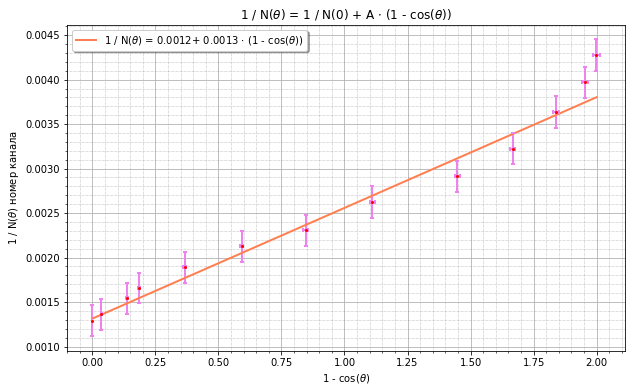

In [79]:
def approx(x, a, b):
    return a * x + b

angle = data1['angle']
sert = data1['sert']

beta_opt1, beta_cov1 = curve_fit(approx, angle, N, sigma=data['er']/data['k'])
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = N - approx(angle,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(angle))
print('S_e = ', S_e)
Stand_error = np.sqrt((N * 0.01)**2 + S_e**2)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(angle, approx(angle, *beta_opt1), 'coral', lw = 2)

lgnd = ax.legend([r'1 / N($\theta$) = %.4f+ %.4f $\cdot$ (1 - $\cos(\theta)$)' %(a,b)], loc='upper left', shadow=True)

ax.set_title(r'1 / N($\theta$) = 1 / N(0) + A $\cdot$ (1 - $\cos(\theta)$)')
ax.set_ylabel(r'1 / N($\theta$) номер канала')
ax.set_xlabel(r'1 - $\cos(\theta)$')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)
ax.grid()
plt.errorbar(angle, N, fmt = 'ro', markersize = '2', xerr = sert, yerr = Stand_error, capsize =2, elinewidth = 2, capthick = 2, ecolor = 'violet')

plt.savefig('plot.png', dpi=400)
plt.show()

In [32]:
print('N(90) = ',1 /approx(1, *beta_opt1))
sn90 = np.sqrt(sigma_a**2/a**2+sigma_b**2/b**2)*(1 /approx(1, *beta_opt1))
sn90

N(90) =  390.8609742668572


15.719193373299602

In [26]:
print('N(0) = ',1 / b)
sn0 = 1/b**2*sigma_b
sn0

N(0) =  760.9284519834798


11.717479307364593

In [23]:
Stand_error = np.sqrt((N * 0.01)**2 + S_e**2)
error90 = Stand_error[10] / approx(1, *beta_opt1)
error90 * 100

IndexError: invalid index to scalar variable.

In [20]:
error0 = Stand_error[0] / b
error0 * 100

13.148773058520089

In [21]:
error = np.sqrt((error90 * 100)**2 + (error0 * 100)**2)
error

14.841577551568761

In [34]:
662*(390.83)/(760.93-390.83)

699.079870305323

In [36]:
699.1*np.sqrt(sigma_a**2/a**2+sigma_b**2/b**2)

28.115593038897003